<a href="https://colab.research.google.com/github/Prakartt/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation-/blob/main/Copy_of_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

## Preprocessing 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler,QuantileTransformer,MinMaxScaler

In [ ]:
df = pd.read_csv("/train-csv.txt")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0.0,unknown,no


In [ ]:
df.describe()

,age,balance,day,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45210.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,0.580336
std,10.618762,3044.765829,8.322476,257.527812,3.098021,2.303465
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df_org = df[["age", "job", 'marital', 'education', 'balance', 'housing', 'loan',]]

In [ ]:
df_org.describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


In [ ]:
df_org.job.value_counts().index

Index(['blue-collar', 'management', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object')

In [ ]:
df_org.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
df_org.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [ ]:
df_org.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [ ]:
df_org.drop(df_org[df_org.balance < 1].index).describe()

,age,balance
count,37931.000000,37931.000000
mean,40.985025,1655.270254
std,10.762390,3240.126649
min,18.000000,1.000000
25%,33.000000,226.500000
50%,39.000000,644.000000
75%,49.000000,1776.000000
max,95.000000,102127.000000


In [ ]:
df_org.drop(df_org[df_org.balance < 1].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_original=df_org
print(df_original.shape,df_org.shape)


(37931, 7) (37931, 7)


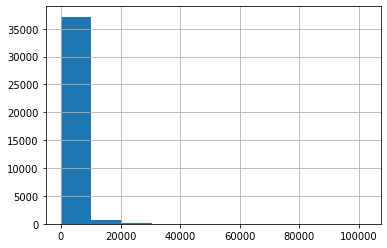

In [ ]:
df_org.balance.hist()

(array([  485.,   613.,  1147.,  2950.,  7038., 11169.,  9342.,  4388.,
          751.,    48.]),
 array([ 0.        ,  1.15339724,  2.30679448,  3.46019172,  4.61358897,
         5.76698621,  6.92038345,  8.07378069,  9.22717793, 10.38057517,
        11.53397242]),
 <a list of 10 Patch objects>)

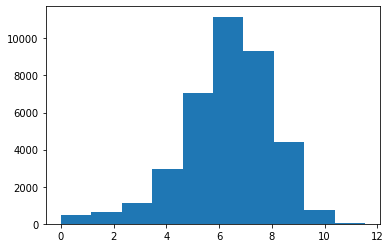

In [ ]:
plt.hist(np.log(df_org.balance))

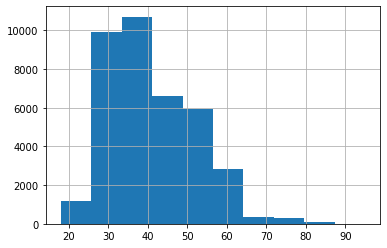

In [ ]:
df_org.age.hist()

In [ ]:
QT = QuantileTransformer(output_distribution='normal')
qt_age = QT.fit_transform(df_org['age'].values.reshape(-1,1))

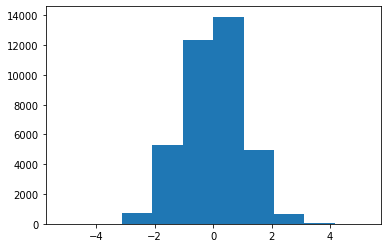

In [ ]:
plt.hist(qt_age)
plt.show()

(array([1.2000e+01, 0.0000e+00, 6.9600e+02, 5.3110e+03, 1.2369e+04,
        1.3910e+04, 4.9390e+03, 6.6600e+02, 2.7000e+01, 1.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

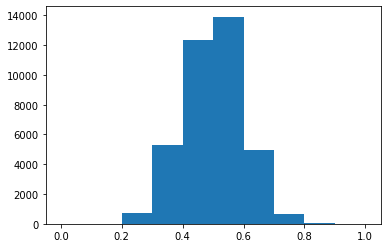

In [ ]:
plt.hist(MinMaxScaler().fit_transform(qt_age))

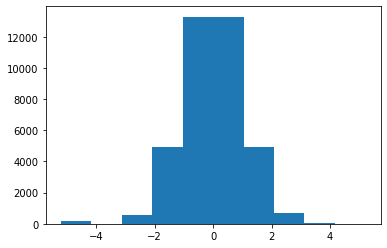

In [ ]:
qt_balance = QT.fit_transform(df_org['balance'].values.reshape(-1,1))
plt.hist(qt_balance)
plt.show()

(array([1.9500e+02, 0.0000e+00, 5.4200e+02, 4.9570e+03, 1.3281e+04,
        1.3294e+04, 4.9460e+03, 6.9200e+02, 2.3000e+01, 1.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

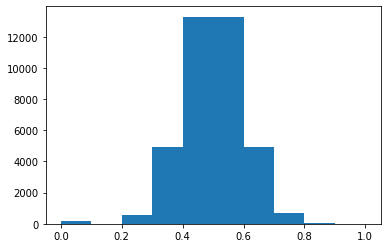

In [ ]:
plt.hist(MinMaxScaler().fit_transform(qt_balance))

In [ ]:
#["age", "job", 'marital', 'education', 'balance', 'housing', 'loan',]
transformer = ColumnTransformer(transformers = [
    ('tnf1',OneHotEncoder(sparse = True, drop = 'first'),['job','marital',]),
   ('tnf2', QuantileTransformer(output_distribution="normal"),['age','balance',]),
    ('tnf3', OrdinalEncoder(categories= [(["unknown","primary", "secondary",'tertiary',])]),['education',]),  
    ('tnf4', OrdinalEncoder(categories= [(["no","yes",])]),['housing',]),
    ('tnf5', OrdinalEncoder(categories= [(["no","yes",])]),['loan',]),
    ('tnf6',MinMaxScaler(),['age','balance'])


], remainder= 'passthrough')


In [ ]:
df_org = transformer.fit_transform(df_org)

In [ ]:
df_org

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.19480519e-01, 2.09740908e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.37662338e-01, 2.74171122e-04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.94805195e-01, 9.79182578e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.01298701e-01, 5.59504925e-02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.06493506e-01, 6.53114780e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.46753247e-01, 2.90817226e-02]])

In [ ]:
df_org.shape


(37931, 20)

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn import metrics
# for clusters in range():
#   kmeans = KMeans(n_clusters = clusters, random_state = 0)
#   kmeans = kmeans.fit(df_org)
#   print(kmeans)

#   print("Silhouette Score = {}\n".format(metrics.silhouette_score(df_org,kmeans.labels_)))

In [ ]:
# from sklearn.cluster import AgglomerativeClustering
# agloc = AgglomerativeClustering(n_clusters=4)
# agloc = agloc.fit(df_org)
# print('Silhouette Score = {}'.format(metrics.silhouette_score(df_org, agloc.labels_)))

In [ ]:
# range_n_clusters = [2, 3]

# for n_clusters in range_n_clusters:

#     kmeans = KMeans(n_clusters=n_clusters, random_state=0)
#     kmeans = kmeans.fit(X)

#     result = pd.concat([df_original, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)
#     result = result.sort_values(by=['cluster'], ascending=[True])

#     with pd.option_context('display.max_rows', None, 'display.max_columns', None):    
        
#         print('{}\t{}\t{}\t{}\t{}'.format('Cluster', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'))
#         print('{}'.format('-' * 80))
        
#         for cluster in result.cluster.unique():
#             print('{:d}\t{:.3f} ({:.3f})\t{:.3f} ({:.3f})\t{:.3f} ({:.3f})\t{:.3f} ({:.3f})'.format(cluster, result[result.cluster==cluster].sepal_length.mean()
#                                                                                                             , result[result.cluster==cluster].sepal_length.std()
#                                                                                                             , result[result.cluster==cluster].sepal_width.mean()
#                                                                                                             , result[result.cluster==cluster].sepal_width.std()
#                                                                                                             , result[result.cluster==cluster].petal_length.mean()
#                                                                                                             , result[result.cluster==cluster].petal_length.std()
#                                                                                                             , result[result.cluster==cluster].petal_width.mean()
#                                                                                                             , result[result.cluster==cluster].petal_width.std()))
        
#         print('\n{}\n'.format('=' * 80))
        
#         x_axis = result.petal_length
#         y_axis = result.petal_width
#         species = result.cluster

#         x_axis_min, x_axis_max = x_axis.min() - .5, x_axis.max() + .5
#         y_axis_min, y_axis_max = y_axis.min() - .5, y_axis.max() + .5

#         # Scatterplot
#         plt.figure()
#         plt.title('Iris Dataset - Clustering By Petal Size (K={})'.format(n_clusters))
#         plt.scatter(x_axis, y_axis, c=species)
#         plt.xlabel('Petal Length')
#         plt.ylabel('Petal Width')
#         plt.xlim(x_axis_min, x_axis_max)
#         plt.ylim(y_axis_min, y_axis_max)
#         plt.xticks(())
#         plt.yticks(())

# plt.show()

In [ ]:
# print(df_original.shape,kmeans.labels_.shape)
# df_original.reset_index(inplace = True)
# result = pd.concat([df_original, pd.DataFrame({'cluster':kmeans.labels_})],axis=1,)
# print(result.shape)
# result = result.sort_values(by=['cluster'], ascending=[True])
# print(result.shape)

In [ ]:
# result.drop('index',axis = 1, inplace = True)
# result

## Clusters = 7

In [ ]:
# range_n_clusters = [2, 8]

# for n_clusters in range(7,8):

#     kmeans = KMeans(n_clusters=n_clusters, random_state=0)
#     kmeans = kmeans.fit(df_org)

#     df_original.reset_index(inplace = True,drop = True)
#     result = pd.concat([df_original, pd.DataFrame({'cluster':kmeans.labels_})],axis=1,)
#     result = result.sort_values(by=['cluster'], ascending=[True])
#     #result.drop('index',axis = 1, inplace = True)
#     with pd.option_context('display.max_rows', None, 'display.max_columns', None):    

#       print('{}\t{}\t\t{}'.format('Cluster', 'Age', 'Balance'))
#       print('{}'.format('-' * 80))
#       for cluster in result.cluster.unique():
#         print('{}\t{:.2f} ({:.2f})\t{:.2f} ({:.2f})\t'.format
#         (cluster, result[result.cluster==cluster].age.mean()
#         , result[result.cluster==cluster].age.std()
#         , result[result.cluster==cluster].balance.mean()
#         , result[result.cluster==cluster].balance.std()))
#         print('{}'.format('-' * 80))
#         #print('{}\t{}'.format(
#             #result[result.cluster==cluster].education.value_counts().sort_index(),
#             #result[result.cluster==cluster].job.value_counts().sort_index()))
#         print()
#        # print(result.education.value_counts().sort_index().plot(kind = 'bar'))
#         plt.show()
#         print('{}'.format('-' * 80))

In [ ]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn import metrics

from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder


In [ ]:
def purity_score(ytrue, ypred):
    confusion_matrix = contingency_matrix(ytrue, ypred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

In [ ]:
km_model = KMeans(n_clusters=7, random_state=42)
km = km_model.fit_predict(df_org)
centroids = km_model.cluster_centers_ 

labels = km_model.labels_ 
print("Silhouette Score = {}\n".format(metrics.silhouette_score(df_org,labels)))

Silhouette Score = 0.1265866792474808



In [ ]:
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

def pyPurity(dist_measure):
    initial_centers = random_center_initializer(df_org, 3, random_state=5).initialize()
    instanceKm = kmeans(df_org, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    instanceKm.process()
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, df_org)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    return purity_score(labels, pyLabels)

for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 35.53%
The purity score for squared euclidean distance is 34.13%
The purity score for manhattan distance is 36.48%
The purity score for chebyshev distance is 33.96%
The purity score for canberra distance is 41.78%
The purity score for chi-square distance is 42.74%
